<a href="https://colab.research.google.com/github/gromdimon/Training--Projects/blob/main/Cancer_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and downloading dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://github.com/gromdimon/Files/raw/main/number-of-cancer-surgeries-volume-performed-in-california-hospitals.csv'
df = pd.read_csv(path, encoding='cp1252')

# First look at data

In [46]:
df1 = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11821 entries, 0 to 11820
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 11821 non-null  int64  
 1   county               11755 non-null  object 
 2   Hospital             11821 non-null  object 
 3   OSHPDID              11755 non-null  float64
 4   Surgery              11821 non-null  object 
 5   # of Cases (ICD 9)   5729 non-null   float64
 6   # of Cases (ICD 10)  6092 non-null   float64
 7   LATITUDE             11748 non-null  float64
 8   LONGITUDE            11748 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 831.3+ KB


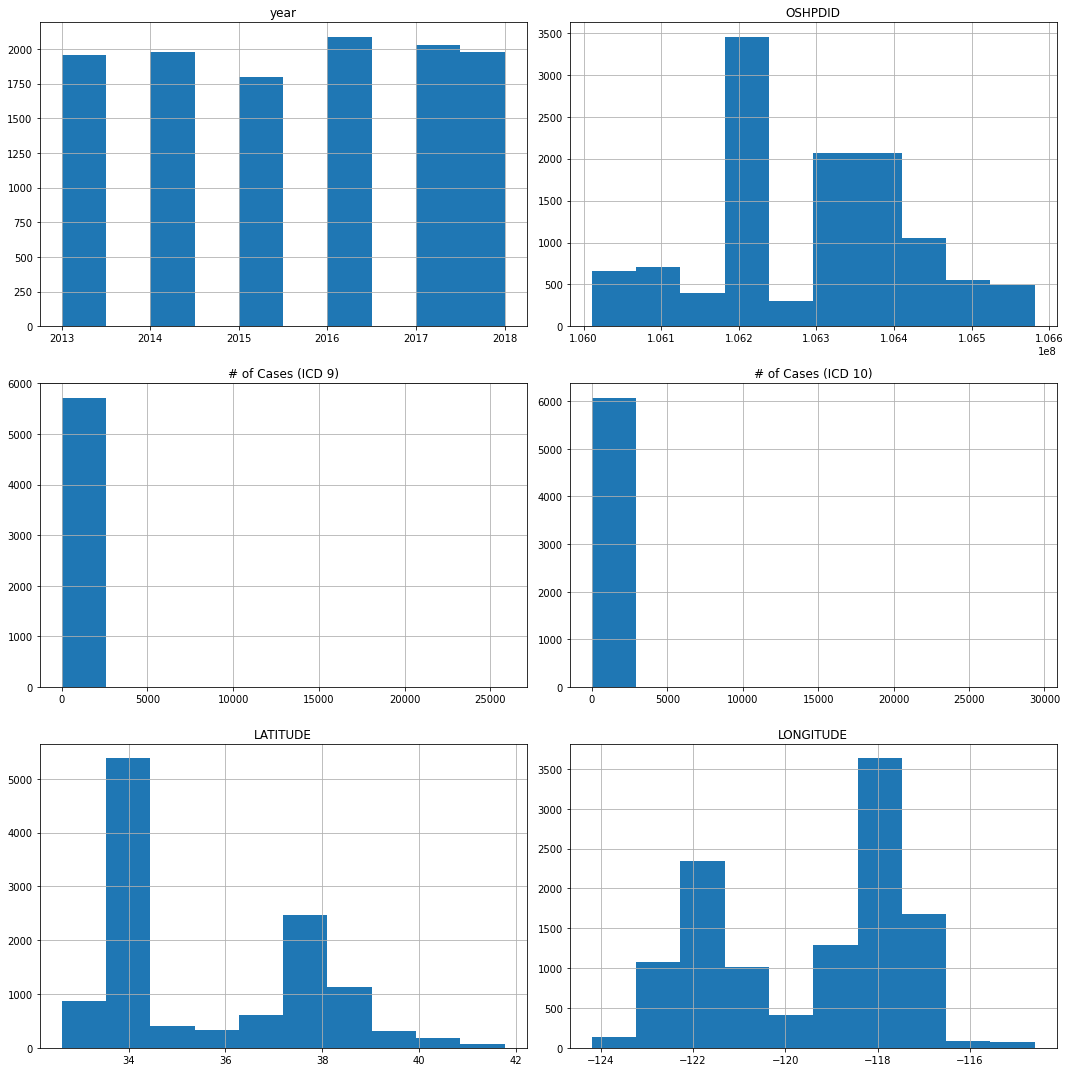

In [11]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [13]:
df.describe()

,year,OSHPDID,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
count,11821.000000,1.175500e+04,5729.000000,6092.000000,11748.000000,11748.000000
mean,2015.523983,1.062823e+08,49.448769,56.127708,35.630675,-119.552318
std,1.709742,1.347787e+05,590.833097,680.657920,2.135230,2.020634
min,2013.000000,1.060107e+08,1.000000,1.000000,32.619090,-124.195140
25%,2014.000000,1.061904e+08,2.000000,2.000000,33.949170,-121.776854


# Managing null values & duplicates

In [21]:
def check_missing_values_and_duplicates(dataframe):
    if dataframe.isnull().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        m_duplicates = dataframe.duplicated().sort_values(ascending=False)
        duplicates = m_duplicates[m_duplicates > 0]

        missing_data = pd.concat([total, percent, duplicates], axis=1, keys=['Total', 'Percent', 'Duplicates'])

        print(f'Total and Percentage of NaN & Duplicates:\n {missing_data}')
    else:
        print('No NaN or Duplicate found.')

In [22]:
check_missing_values_and_duplicates(df)

Total and Percentage of NaN & Duplicates:
                      Total   Percent Duplicates
# of Cases (ICD 9)    6092  0.515354        NaN
# of Cases (ICD 10)   5729  0.484646        NaN
LONGITUDE               73  0.006175        NaN
LATITUDE                73  0.006175        NaN
OSHPDID                 66  0.005583        NaN
county                  66  0.005583        NaN


In [62]:
# Feature for making one column from two
def cases(row):
    if pd.isna(row['# of Cases (ICD 9)']):
      return row['# of Cases (ICD 10)']
    elif pd.isna(row['# of Cases (ICD 10)']):
      return row['# of Cases (ICD 9)']

In [66]:
df['cases'] = df.apply(lambda row: cases(row), axis=1)
df.drop(columns=['# of Cases (ICD 9)', '# of Cases (ICD 10)'], inplace=True)
df.head(3)

,year,county,Hospital,OSHPDID,Surgery,LATITUDE,LONGITUDE,cases
0,2013,NaN,Statewide,NaN,COLON,NaN,NaN,7128.0
1,2013,NaN,Statewide,NaN,BLADDER,NaN,NaN,892.0
2,2013,NaN,Statewide,NaN,RECTUM,NaN,NaN,2128.0


In [67]:
check_missing_values_and_duplicates(df)

Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
LONGITUDE     73  0.006175        NaN
LATITUDE      73  0.006175        NaN
OSHPDID       66  0.005583        NaN
county        66  0.005583        NaN


In [68]:
df.dropna(inplace=True)

In [69]:
check_missing_values_and_duplicates(df)

No NaN found.


# Managing outliers

In [77]:
selection = ['year', 'OSHPDID', 'LONGITUDE', 'cases']
df1 = df[selection]

In [78]:
from sklearn.ensemble import IsolationForest
identifier = IsolationForest().fit(df1)
identifier.predict(df1)

array([-1, -1, -1, ..., -1, -1, -1])